In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.linalg import expm
from datetime import datetime
import time
import scipy.sparse as sp

In [ ]:
time_start = time.time()
##Discretise space:
N = 256
x = np.linspace(-1,1,N)
h = x[1] - x[0]
##set initial conditions
u = 0.53*x + 0.47*np.sin(-1.5*np.pi*x)
u[0] = -1
u[-1] = 1
## Differentiation matrix plus identity:
D = sp.diags([1,-2,1],[-1,0,1],shape=(N,N)).toarray()
I = np.eye(N)
##Linear operator L:
L = 0.01*D
L[0,:] = L[-1,:] = 0
L[0,0] = L[-1,-1] = 1

M = 64

r = 15 * np.exp(1j * 2*np.pi * (np.arange(1, M+1) - 0.5) / M)

A = h * L
E = expm(A)
E2 = expm(A / 2)

I = np.eye(N)
Z = np.zeros((N, N))

f1 = Z.copy()
f2 = Z.copy()
f3 = Z.copy()
Q  = Z.copy()

for j in range(M):
    z = r[j]
    zIA = np.linalg.inv(z * I - A)

    Q  = Q + h * zIA * (np.exp(z/2) - 1)
    f1 = f1 + h * zIA * (-4 - z + np.exp(z)*(4 - 3*z + z**2)) / z**2
    f2 = f2 + h * zIA * (2 + z + np.exp(z)*(z - 2)) / z**2
    f3 = f3 + h * zIA * (-4 - 3*z - z**2 + np.exp(z)*(4 - z)) / z**2

Q  = np.real(Q)/M
f1 = np.real(f1)/M
f2 = np.real(f2)/M
f3 = np.real(f3)/M

uu = u.reshape(-1, 1)
tt = np.array([0.0])

tmax = 70
nmax = round(tmax / h)
nplt = int(np.floor((tmax / 20) / h))

for n in range(1, nmax + 1):
    print("n = ", n)
    t = n * h

    Nu = u-u**3
    a  = E2 @ u + Q @ Nu
    Na = a-a**3

    b  = E2 @ u + Q @ Na
    Nb = b-b**3

    c  = E2 @ a + Q @ (2*Nb - Nu)
    Nc = c-c**3

    u = E @ u + f1 @ Nu + 2*f2 @ (Na + Nb) + f3 @ Nc

    if n % nplt == 0:
        print("Saving at t = ", t)
        u[0] = -1
        u[-1] = 1
        uu = np.hstack((uu, u.reshape(-1, 1)))
        tt = np.append(tt, t)
        
time_end = time.time()
time_elapsed = time_end - time_start
print(f"ETD_AC execution time: {time_elapsed} seconds")

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10
n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17
n =  18
n =  19
n =  20
n =  21
n =  22
n =  23
n =  24
n =  25
n =  26
n =  27
n =  28
n =  29
n =  30
n =  31
n =  32
n =  33
n =  34
n =  35
n =  36
n =  37
n =  38
n =  39
n =  40
n =  41
n =  42
n =  43
n =  44
n =  45
n =  46
n =  47
n =  48
n =  49
n =  50
n =  51
n =  52
n =  53
n =  54
n =  55
n =  56
n =  57
n =  58
n =  59
n =  60
n =  61
n =  62
n =  63
n =  64
n =  65
n =  66
n =  67
n =  68
n =  69
n =  70
n =  71
n =  72
n =  73
n =  74
n =  75
n =  76
n =  77
n =  78
n =  79
n =  80
n =  81
n =  82
n =  83
n =  84
n =  85
n =  86
n =  87
n =  88
n =  89
n =  90
n =  91
n =  92
n =  93
n =  94
n =  95
n =  96
n =  97
n =  98
n =  99
n =  100
n =  101
n =  102
n =  103
n =  104
n =  105
n =  106
n =  107
n =  108
n =  109
n =  110
n =  111
n =  112
n =  113
n =  114
n =  115
n =  116
n =  117
n =  118
n =  119
n =  120
n =  121
n =  122
n =  123
n

In [31]:
L

array([[ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.01, -0.02,  0.01, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.01, -0.02, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., -0.02,  0.01,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.01, -0.02,  0.01],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

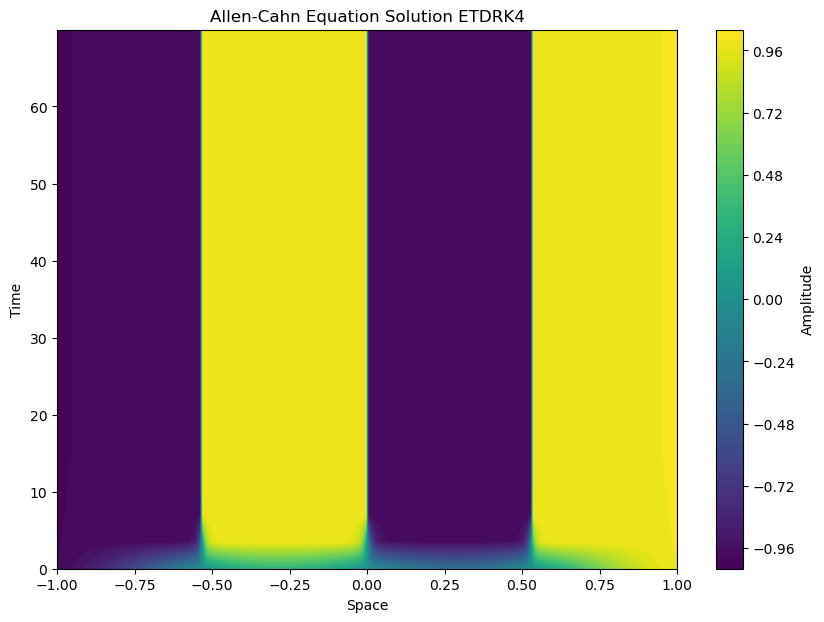

In [30]:
# Plot results using a contour plot
fig, ax = plt.subplots(figsize=(10, 7))
X, T = np.meshgrid(x, tt, indexing='ij')  # Ensure consistent indexing
contour = ax.contourf(X,T, uu[:,:], levels=50, cmap=cm.viridis)  # Swap X and T to match uu's shape

# Add a colorbar
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Amplitude')

# Set labels and title
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_title('Allen-Cahn Equation Solution ETDRK4')

plt.show()
